In [1]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install Sequential

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Sequential: filename=sequential-1.0.0-py3-none-any.whl size=2948 sha256=3d5d8cb394ad2df885c6d7aca78eb0343ce4883002f501a430bcdf0319cd45e8
  Stored in directory: c:\users\adimo\appdata\local\pip\cache\wheels\05\ac\b5\068680e1aff2cfe9e3a77e3233bbfb04c612152e6d02089c47
Successfully built Sequential
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'Sequential' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'Sequential'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [5]:
data = pd.read_csv('data\Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [10]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20

35/35 - 15s - loss: 0.0439 - 15s/epoch - 433ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0126 - 4s/epoch - 128ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0111 - 5s/epoch - 137ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0084 - 5s/epoch - 136ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0076 - 5s/epoch - 131ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0109 - 5s/epoch - 130ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0070 - 6s/epoch - 181ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0061 - 8s/epoch - 230ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0066 - 8s/epoch - 235ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0070 - 8s/epoch - 242ms/step
Epoch 11/20
35/35 - 9s - loss: 0.0064 - 9s/epoch - 251ms/step
Epoch 12/20
35/35 - 8s - loss: 0.0062 - 8s/epoch - 242ms/step
Epoch 13/20
35/35 - 9s - loss: 0.0061 - 9s/epoch - 244ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 242ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0065 - 9s/epoch - 245ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0065 - 9s/epoch - 249ms/step
Epoch 17/20
35

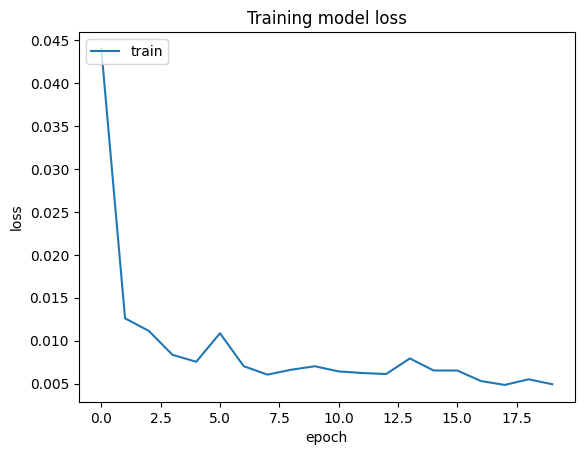

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
testData = pd.read_csv('data\Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [16]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 4s 94ms/step


array([[1.1770579],
       [1.1793264],
       [1.1888845],
       [1.204202 ],
       [1.2185506],
       [1.223008 ],
       [1.2159054],
       [1.2021056],
       [1.1905552],
       [1.1846862],
       [1.177078 ],
       [1.1663613],
       [1.1560822],
       [1.1463335],
       [1.1420909],
       [1.1437882],
       [1.1571232],
       [1.1809149],
       [1.2107065],
       [1.2425044],
       [1.2611444],
       [1.2655404],
       [1.25345  ],
       [1.2301383],
       [1.2049978],
       [1.186422 ],
       [1.1769994],
       [1.1721938],
       [1.1644627],
       [1.1543918],
       [1.1432337],
       [1.1305847],
       [1.1126127],
       [1.0900685],
       [1.0772806],
       [1.0802789],
       [1.095903 ],
       [1.117557 ],
       [1.1408329],
       [1.156655 ],
       [1.1715063],
       [1.1874473],
       [1.2048712],
       [1.2214622],
       [1.233973 ],
       [1.2385237],
       [1.2329222],
       [1.2253855],
       [1.2212462],
       [1.2233897],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

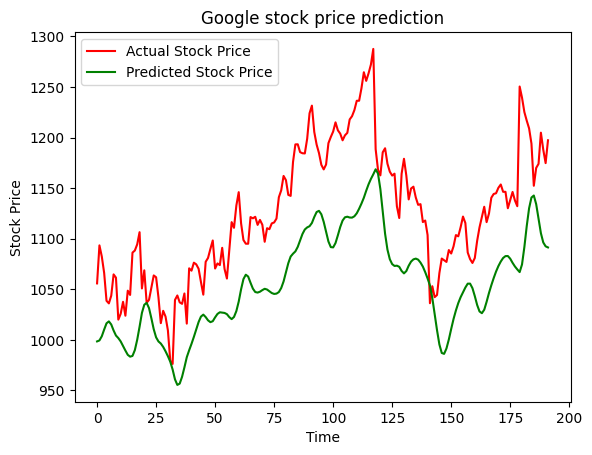

In [18]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()